<a href="https://colab.research.google.com/github/Hamza-t/Deep-Learning-Labs/blob/main/TP_N%C2%B03_Les_R%C3%A9seaux_de_Neurones_R%C3%A9currents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP N°3 : Les Réseaux de Neurones Récurrents

---


**Objectif :**

Ce TP a pour objectif d’appliquer trois types différents de réseaux de neurones profonds sur un
ensemble de données du monde réel. Nous utiliserons le réseau de neurones à connexion dense
(réseau de neurones de base), le réseau de neurones convolutionnel (CNN) et le réseau de
mémoire à long court terme (LSTM), qui est une variante des réseaux de neurones récurrents.
Nous allons utiliser Keras Embedding Layer et GloVe comme word embedding pour convertir
le texte en forme numérique. 

##I/ Importation des bibliothèques :


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import MaxPooling1D
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

##II/ Importation du dataset :

In [ ]:
url = 'IMDB Dataset.csv'
movie_reviews = pd.read_csv(url)

In [ ]:
movie_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Quelle est la dimention du dataset ? 

In [ ]:
movie_reviews.shape

(50000, 2)

Contient-il des valeurs NULL ? 

In [ ]:
movie_reviews.isnull().values.any()

False

Affichez les 5 premières lignes. 

In [ ]:
movie_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Utiliser la méthode countplot de la librairie seaborn pour voir si le dataset est équilibré ou non ?

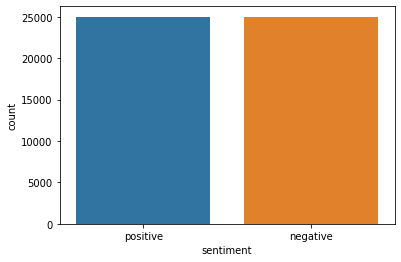

In [ ]:
import seaborn as sns
sns.countplot(x= 'sentiment', data= movie_reviews)

Afficher le 4ème review

In [ ]:
review4 = movie_reviews.iloc[3, 0]
review4

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

##III/ Prétraitement de données :

In [ ]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
 return TAG_RE.sub('', text)

executer la fonction pour le 4ème review

In [ ]:
preprocess_text(review4)

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

Prétraitez les reviews et stockez-les dans une nouvelle liste

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

convertir la sortie en nombres entiers en remplaçant "positif" par le chiffre 1 et négatif par le chiffre 0

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Diviser le dataset en training et test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

##IV/ La couche de l’embedding :

Dans un premier temps, nous allons utiliser la classe Tokenizer du module keras.preprocessing.text pour créer un dictionnaire word-to-index. Dans le dictionnaire word-to-index, chaque mot du corpus est utilisé comme clé, tandis qu'un index unique correspondant est utilisé comme valeur pour la clé. Exécutez le script suivant :

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train contient 50000 listes correspondant aux phrases où chacune contient des entiers. La taille de chaque liste est différente car les phrases possèdent des tailles différentes. Le script ci-dessous trouve la taille du vocabulaire, puis effectue un remplissage sur l'ensemble d'entraînement et de test.


In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Les listes ont la même longueur, c'est-à-dire 100. De plus, la variable vocabulary_size contient maintenant une valeur 92547, ce qui signifie que le corpus contient 92547 mots
uniques. GloVe pour créer notre matrice de fonctionnalités.
Nous utiliserons GloVe pour créer notre matrice de features. Dans le script suivant, nous chargeons GloVe et créons un dictionnaire qui contiendra des mots en tant que clés et
leur liste d’embeddings correspondante en tant que valeurs.


##A. Glove : 

---





In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
def embeddings(path):
  embeddings_dictionary = dict()
  embeddings_file = open(path, encoding="utf8")
  for line in embeddings_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:],dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
  embeddings_file.close()
  return embeddings_dictionary

In [ ]:
embeddings_dictionary = embeddings("/content/glove.6B.100d.txt")

Enfin, nous allons créer une matrice d’embeddings où chaque numéro de ligne correspondra à l'index du mot dans le corpus. La matrice aura 100 colonnes où chaque colonne contiendra les embeddings GloVe pour les mots de notre corpus.

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
 embedding_vector = embeddings_dictionary.get(word)
 if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37771001,  0.22946   , -0.30311   , ..., -0.33610001,
         0.02637   , -0.72302002],
       [ 0.99882001,  0.044     ,  0.58508003, ..., -0.54869002,
         0.15141   ,  1.36880004]])

###1/ Classification avec un simple réseau de neurones

####a) Créer le modèle

In [ ]:
def simple_model(X_train, y_train):
  # create model
  model = Sequential()
  model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
  model.add(Flatten())
  model.add(Dense(1, activation= "sigmoid"))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
  #fit model
  history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
  return model, history

In [ ]:
model, history = simple_model(X_train, y_train)

Epoch 1/6
250/250 [==============================] - 2s 6ms/step - loss: 0.6075 - acc: 0.6691 - val_loss: 0.5424 - val_acc: 0.7270
Epoch 2/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4998 - acc: 0.7576 - val_loss: 0.5217 - val_acc: 0.7391
Epoch 3/6
250/250 [==============================] - 2s 6ms/step - loss: 0.4615 - acc: 0.7829 - val_loss: 0.5550 - val_acc: 0.7201
Epoch 4/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4407 - acc: 0.7955 - val_loss: 0.5230 - val_acc: 0.7410
Epoch 5/6
250/250 [==============================] - 1s 5ms/step - loss: 0.4196 - acc: 0.8081 - val_loss: 0.5233 - val_acc: 0.7439
Epoch 6/6
250/250 [==============================] - 1s 6ms/step - loss: 0.4164 - acc: 0.8090 - val_loss: 0.5311 - val_acc: 0.7387


####b) Évaluer le modèle

In [ ]:
def evaluate(model, X_test, y_test):
  score = model.evaluate(X_test, y_test, verbose=1)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5336 - acc: 0.7479
Test Score: 0.5336050987243652
Test Accuracy: 0.7479000091552734


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

In [ ]:
def plotting(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

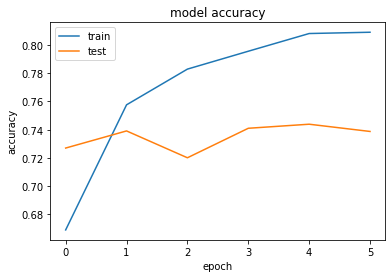

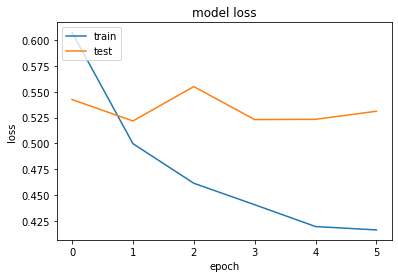

In [ ]:
plotting(history)

###2/ Classification avec un réseau de neurones convolutionnel CNN

####a) Créer le modèle

In [ ]:
def CNN_model(X_train, y_train):
  # create model
  model = Sequential()
  model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False))
  model.add(Conv1D(filters=128, kernel_size=5, activation= 'relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(1, activation='sigmoid'))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
  #fit model
  history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
  return model, history

In [ ]:
model, history = CNN_model(X_train, y_train)

Epoch 1/6
250/250 [==============================] - 24s 94ms/step - loss: 0.5098 - acc: 0.7492 - val_loss: 0.3973 - val_acc: 0.8220
Epoch 2/6
250/250 [==============================] - 23s 93ms/step - loss: 0.3715 - acc: 0.8363 - val_loss: 0.3630 - val_acc: 0.8356
Epoch 3/6
250/250 [==============================] - 26s 104ms/step - loss: 0.3172 - acc: 0.8671 - val_loss: 0.3805 - val_acc: 0.8254
Epoch 4/6
250/250 [==============================] - 23s 93ms/step - loss: 0.2817 - acc: 0.8846 - val_loss: 0.3428 - val_acc: 0.8476
Epoch 5/6
250/250 [==============================] - 24s 96ms/step - loss: 0.2484 - acc: 0.9037 - val_loss: 0.3674 - val_acc: 0.8375
Epoch 6/6
250/250 [==============================] - 24s 95ms/step - loss: 0.2151 - acc: 0.9214 - val_loss: 0.3449 - val_acc: 0.8478


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3344 - acc: 0.8512
Test Score: 0.33438143134117126
Test Accuracy: 0.8511999845504761


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

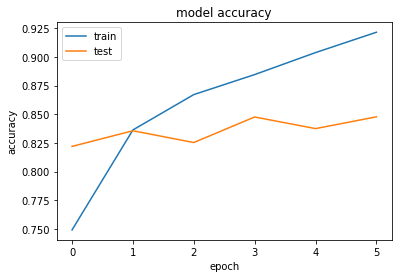

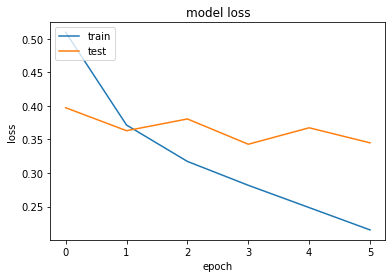

In [ ]:
plotting(history)

###3/ Classification avec un réseau de neurones récurrent RNN (LSTM)

####a) Créer le modèle

In [ ]:
def LSTM_model(X_train, y_train, l, embedding_matrix):
  # create model
  model = Sequential()
  model.add(Embedding(vocab_size, l, weights=[embedding_matrix], input_length=maxlen , trainable=False))
  model.add(LSTM(128))
  model.add(Dense(1, activation='sigmoid'))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
  #fit model
  history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
  return model, history

In [ ]:
model, history = LSTM_model(X_train, y_train, 100, embedding_matrix)

Epoch 1/6
250/250 [==============================] - 87s 338ms/step - loss: 0.5557 - acc: 0.7072 - val_loss: 0.4840 - val_acc: 0.7657
Epoch 2/6
250/250 [==============================] - 84s 335ms/step - loss: 0.4524 - acc: 0.7915 - val_loss: 0.4965 - val_acc: 0.7766
Epoch 3/6
250/250 [==============================] - 85s 340ms/step - loss: 0.4056 - acc: 0.8155 - val_loss: 0.3802 - val_acc: 0.8282
Epoch 4/6
250/250 [==============================] - 84s 335ms/step - loss: 0.3717 - acc: 0.8335 - val_loss: 0.3584 - val_acc: 0.8428
Epoch 5/6
250/250 [==============================] - 84s 337ms/step - loss: 0.3509 - acc: 0.8450 - val_loss: 0.3479 - val_acc: 0.8475
Epoch 6/6
250/250 [==============================] - 86s 345ms/step - loss: 0.3268 - acc: 0.8580 - val_loss: 0.3500 - val_acc: 0.8465


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.3496 - acc: 0.8432
Test Score: 0.3495866358280182
Test Accuracy: 0.8432000279426575


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

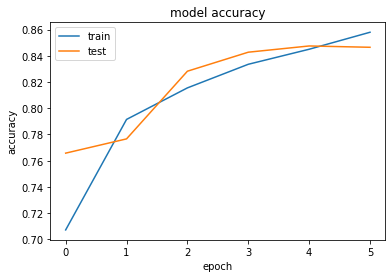

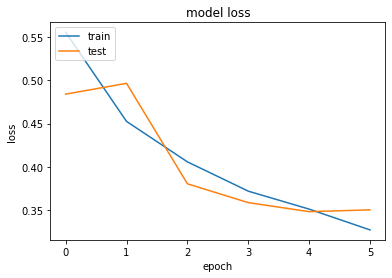

In [ ]:
plotting(history)

####d) Comparer les résultats des 3 classifieurs

**classifieur 1 : simple réseau de neurones :**
                
                Test Score: 0.5336050987243652
                Test Accuracy: 0.7479000091552734

**classifieur 2 : réseau de neurones convolutionnel CNN :**
                
                Test Score: 0.33438143134117126
                Test Accuracy: 0.8511999845504761

**classifieur 3 : réseau de neurones récurrent RNN (LSTM) :**
                
                Test Score: 0.3495866358280182
                Test Accuracy: 0.8432000279426575



---


  **=> les classifieurs 2 et 3 ont donné des résultats très proches, et meilleurs que celles du classifieur 1**

####e) Choisir une instance aléatoirement et donner sa polarité.

In [ ]:
index = np.random.randint(0, 10000)
index

8227

In [ ]:
instance = X_test[index]
instance

array([   3,  358,    2,    1,  845,    3,   24,   27,    1,  125,    3,
        249,  115,   46,  131,  266,   72,   95,   47,  700,    6,  687,
       3312,   18,    1,  172,    3,    1, 1065,  234,    3,  423,   27,
         62,  424,  159,   28,   20,  409, 3690,   79,  479,   41,   21,
         63,   95,    3, 3997,   49, 1084,   42,    4,   25, 2641,  117,
          7,   22, 2367,   19,    9,   67,  118,   75, 1065,   15,   63,
         52,  319,   28,   67,    8, 1152,   41,   20,   27,   26,    3,
         43,  738,    2, 1781,   42,  428,    8,  115,   56,   25,    1,
        464, 2931,    9,  738,    2, 1781,    5,  278,    2,   13,   26,
        337], dtype=int32)

In [ ]:
y_test[index]

0

In [ ]:
prediction = model.predict(np.array([instance]))[0]
prediction

array([0.18452162], dtype=float32)

In [ ]:
if prediction[0] > 0.5 :
  print('positive')
else :
  print('negative')

negative


###4/ Classification avec un réseau de neurones récurrent RNN (GRU)

####a) Créer le modèle 

In [ ]:
def GRU_model(X_train, y_train, l, embedding_matrix):
  # create model
  model = Sequential()
  model.add(Embedding(vocab_size, l, weights=[embedding_matrix], input_length=maxlen , trainable=False))
  model.add(GRU(128))
  model.add(Dense(1, activation='sigmoid'))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
  #fit model
  history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
  return model, history

In [ ]:
model, history = GRU_model(X_train, y_train, 100, embedding_matrix)

Epoch 1/6
250/250 [==============================] - 69s 271ms/step - loss: 0.5331 - acc: 0.7191 - val_loss: 0.4025 - val_acc: 0.8179
Epoch 2/6
250/250 [==============================] - 67s 270ms/step - loss: 0.3952 - acc: 0.8207 - val_loss: 0.3759 - val_acc: 0.8359
Epoch 3/6
250/250 [==============================] - 67s 268ms/step - loss: 0.3622 - acc: 0.8372 - val_loss: 0.3540 - val_acc: 0.8440
Epoch 4/6
250/250 [==============================] - 67s 267ms/step - loss: 0.3373 - acc: 0.8520 - val_loss: 0.3577 - val_acc: 0.8394
Epoch 5/6
250/250 [==============================] - 67s 267ms/step - loss: 0.3163 - acc: 0.8614 - val_loss: 0.3322 - val_acc: 0.8572
Epoch 6/6
250/250 [==============================] - 67s 269ms/step - loss: 0.2963 - acc: 0.8741 - val_loss: 0.3233 - val_acc: 0.8565


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.3140 - acc: 0.8623
Test Score: 0.313990980386734
Test Accuracy: 0.8622999787330627


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

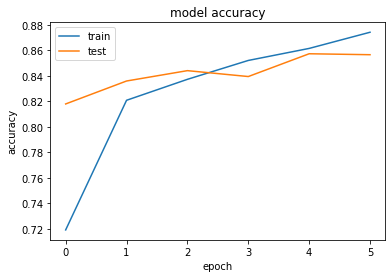

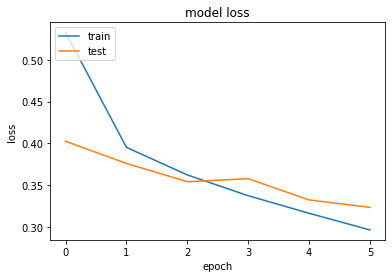

In [ ]:
plotting(history)

###5/ Classification avec un réseau RNN+CNN

####a) Créer le modèle

In [ ]:
def RNNCNN_model(X_train, y_train, l, embedding_matrix):
    model = Sequential()
    model.add((Embedding(vocab_size, l, weights=[embedding_matrix],input_length=maxlen)))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D())
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return model,history

In [ ]:
model, history = RNNCNN_model(X_train, y_train, 100, embedding_matrix)

Epoch 1/6
250/250 [==============================] - 104s 408ms/step - loss: 0.4808 - accuracy: 0.7533 - val_loss: 0.3802 - val_accuracy: 0.8200
Epoch 2/6
250/250 [==============================] - 102s 409ms/step - loss: 0.3244 - accuracy: 0.8611 - val_loss: 0.4098 - val_accuracy: 0.8170
Epoch 3/6
250/250 [==============================] - 102s 409ms/step - loss: 0.2687 - accuracy: 0.8890 - val_loss: 0.3068 - val_accuracy: 0.8696
Epoch 4/6
250/250 [==============================] - 102s 410ms/step - loss: 0.2292 - accuracy: 0.9090 - val_loss: 0.3118 - val_accuracy: 0.8701
Epoch 5/6
250/250 [==============================] - 101s 404ms/step - loss: 0.1882 - accuracy: 0.9270 - val_loss: 0.3641 - val_accuracy: 0.8673
Epoch 6/6
250/250 [==============================] - 103s 412ms/step - loss: 0.1510 - accuracy: 0.9452 - val_loss: 0.3535 - val_accuracy: 0.8602


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.3324 - accuracy: 0.8672
Test Score: 0.3323545455932617
Test Accuracy: 0.8672000169754028


##B. Word2Vec

---



In [ ]:
word2vec=embeddings("/content/GoogleNews-vectors-negative300(first500000).txt")

In [ ]:
embedding_matrix1 = zeros((vocab_size, 300)) 
for word, index in tokenizer.word_index.items(): 
    embedding_vector = word2vec.get(word) 
    if embedding_vector is not None: 
        embedding_matrix1[index] = embedding_vector

###1/ Classification avec un réseau de neurones récurrent (LSTM)

####a) Créer le modèle

In [ ]:
model, history = LSTM_model(X_train, y_train, 300, embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 111s 436ms/step - loss: 0.4739 - acc: 0.7733 - val_loss: 0.3938 - val_acc: 0.8325
Epoch 2/6
250/250 [==============================] - 108s 432ms/step - loss: 0.4042 - acc: 0.8191 - val_loss: 0.3765 - val_acc: 0.8313
Epoch 3/6
250/250 [==============================] - 109s 436ms/step - loss: 0.3670 - acc: 0.8361 - val_loss: 0.3968 - val_acc: 0.8095
Epoch 4/6
250/250 [==============================] - 108s 433ms/step - loss: 0.3488 - acc: 0.8453 - val_loss: 0.3912 - val_acc: 0.8420
Epoch 5/6
250/250 [==============================] - 109s 437ms/step - loss: 0.3327 - acc: 0.8547 - val_loss: 0.3268 - val_acc: 0.8580
Epoch 6/6
250/250 [==============================] - 109s 435ms/step - loss: 0.3172 - acc: 0.8630 - val_loss: 0.3247 - val_acc: 0.8615


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 20s 65ms/step - loss: 0.3194 - acc: 0.8627
Test Score: 0.31937655806541443
Test Accuracy: 0.8626999855041504


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

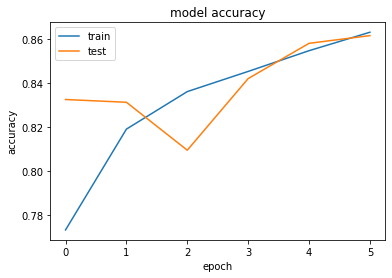

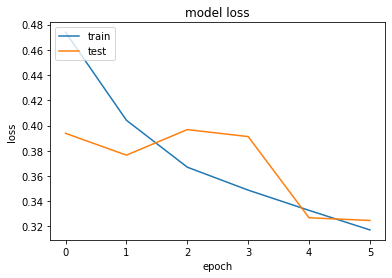

In [ ]:
plotting(history)

###2/ Classification avec un réseau de neurones récurrent (GRU)

####a) Créer le modèle

In [ ]:
model, history = GRU_model(X_train, y_train, 300, embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 88s 345ms/step - loss: 0.4694 - acc: 0.7642 - val_loss: 0.3754 - val_acc: 0.8365
Epoch 2/6
250/250 [==============================] - 86s 346ms/step - loss: 0.3693 - acc: 0.8367 - val_loss: 0.3373 - val_acc: 0.8509
Epoch 3/6
250/250 [==============================] - 86s 345ms/step - loss: 0.3385 - acc: 0.8514 - val_loss: 0.3841 - val_acc: 0.8340
Epoch 4/6
250/250 [==============================] - 86s 343ms/step - loss: 0.3210 - acc: 0.8601 - val_loss: 0.3277 - val_acc: 0.8589
Epoch 5/6
250/250 [==============================] - 85s 341ms/step - loss: 0.3054 - acc: 0.8684 - val_loss: 0.3116 - val_acc: 0.8630
Epoch 6/6
250/250 [==============================] - 85s 341ms/step - loss: 0.2949 - acc: 0.8742 - val_loss: 0.3405 - val_acc: 0.8518


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 12s 37ms/step - loss: 0.3373 - acc: 0.8471
Test Score: 0.33732911944389343
Test Accuracy: 0.847100019454956


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

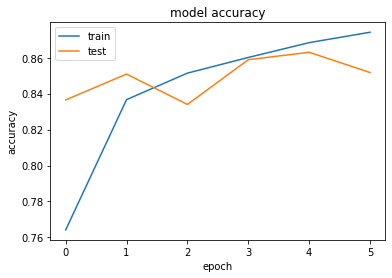

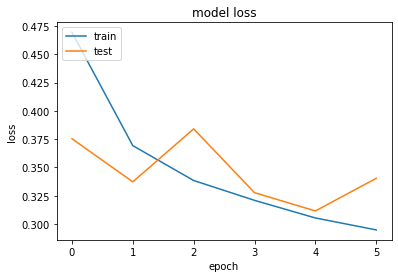

In [ ]:
plotting(history)

###3/ Classification avec un réseau RNN+CNN

####a) Créer le modèle

In [ ]:
model, history = RNNCNN_model(X_train, y_train, 300, embedding_matrix1)

Epoch 1/6
250/250 [==============================] - 212s 839ms/step - loss: 0.4118 - accuracy: 0.8046 - val_loss: 0.3384 - val_accuracy: 0.8508
Epoch 2/6
250/250 [==============================] - 209s 836ms/step - loss: 0.2783 - accuracy: 0.8874 - val_loss: 0.3279 - val_accuracy: 0.8600
Epoch 3/6
250/250 [==============================] - 208s 833ms/step - loss: 0.2177 - accuracy: 0.9163 - val_loss: 0.3167 - val_accuracy: 0.8696
Epoch 4/6
250/250 [==============================] - 208s 834ms/step - loss: 0.1526 - accuracy: 0.9459 - val_loss: 0.3493 - val_accuracy: 0.8637
Epoch 5/6
250/250 [==============================] - 210s 838ms/step - loss: 0.0858 - accuracy: 0.9737 - val_loss: 0.4435 - val_accuracy: 0.8622
Epoch 6/6
250/250 [==============================] - 210s 839ms/step - loss: 0.0436 - accuracy: 0.9878 - val_loss: 0.5459 - val_accuracy: 0.8599


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 13s 42ms/step - loss: 0.5128 - accuracy: 0.8630
Test Score: 0.5127543807029724
Test Accuracy: 0.8629999756813049


##C. FastText

---



In [ ]:
from tqdm import tqdm
import os, re, csv, math, codecs

In [ ]:
embeddings_index = {}
f = codecs.open('/content/fasttext.wiki.simple.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

111052it [00:11, 9549.60it/s]

found 111052 word vectors


In [ ]:
embedding_matrix2 = zeros((vocab_size, 100)) 
for word, index in tokenizer.word_index.items(): 
    embeddings_index = embeddings_dictionary.get(word) 
    if embeddings_index is not None: 
        embedding_matrix2[index] = embeddings_index

###1/ Classification avec un réseau de neurones récurrent (LSTM)

####a) Créer le modèle

In [ ]:
model, history = LSTM_model(X_train, y_train, 100, embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 86s 334ms/step - loss: 0.5439 - acc: 0.7176 - val_loss: 0.4911 - val_acc: 0.7871
Epoch 2/6
250/250 [==============================] - 83s 332ms/step - loss: 0.4325 - acc: 0.8017 - val_loss: 0.3955 - val_acc: 0.8220
Epoch 3/6
250/250 [==============================] - 84s 336ms/step - loss: 0.3943 - acc: 0.8211 - val_loss: 0.3731 - val_acc: 0.8350
Epoch 4/6
250/250 [==============================] - 83s 332ms/step - loss: 0.3677 - acc: 0.8361 - val_loss: 0.3746 - val_acc: 0.8255
Epoch 5/6
250/250 [==============================] - 84s 335ms/step - loss: 0.3424 - acc: 0.8494 - val_loss: 0.3437 - val_acc: 0.8519
Epoch 6/6
250/250 [==============================] - 83s 334ms/step - loss: 0.3285 - acc: 0.8579 - val_loss: 0.3411 - val_acc: 0.8543


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.3422 - acc: 0.8476
Test Score: 0.3422029912471771
Test Accuracy: 0.847599983215332


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

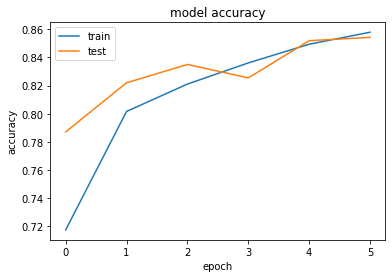

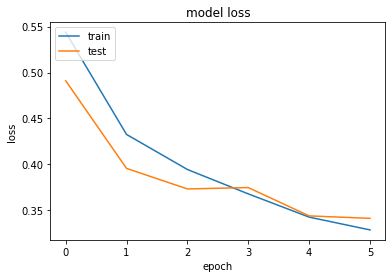

In [ ]:
plotting(history)

###2/ Classification avec un réseau de neurones récurrent (GRU)

####a) Créer le modèle

In [ ]:
model, history = GRU_model(X_train, y_train, 100, embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 69s 270ms/step - loss: 0.5260 - acc: 0.7253 - val_loss: 0.4061 - val_acc: 0.8125
Epoch 2/6
250/250 [==============================] - 66s 265ms/step - loss: 0.3910 - acc: 0.8245 - val_loss: 0.3947 - val_acc: 0.8148
Epoch 3/6
250/250 [==============================] - 67s 268ms/step - loss: 0.3614 - acc: 0.8395 - val_loss: 0.3529 - val_acc: 0.8406
Epoch 4/6
250/250 [==============================] - 67s 268ms/step - loss: 0.3357 - acc: 0.8538 - val_loss: 0.3354 - val_acc: 0.8535
Epoch 5/6
250/250 [==============================] - 67s 267ms/step - loss: 0.3131 - acc: 0.8627 - val_loss: 0.3284 - val_acc: 0.8587
Epoch 6/6
250/250 [==============================] - 67s 266ms/step - loss: 0.2958 - acc: 0.8747 - val_loss: 0.3229 - val_acc: 0.8594


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.3121 - acc: 0.8643
Test Score: 0.3121294379234314
Test Accuracy: 0.864300012588501


####c) Tracer les fonctions de loss et de accuracy pour les training et test sets

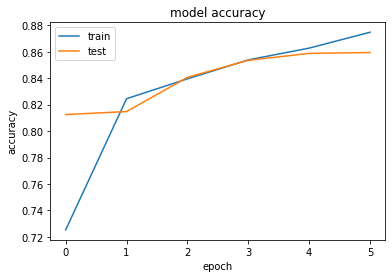

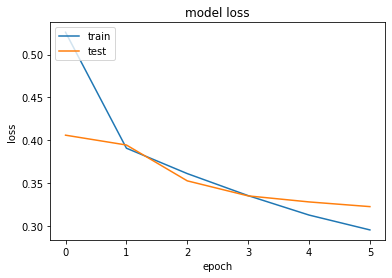

In [ ]:
plotting(history)

###3/ Classification avec un réseau RNN+CNN

####a) Créer le modèle

In [ ]:
model, history = RNNCNN_model(X_train, y_train, 100, embedding_matrix2)

Epoch 1/6
250/250 [==============================] - 103s 404ms/step - loss: 0.4802 - accuracy: 0.7595 - val_loss: 0.3481 - val_accuracy: 0.8468
Epoch 2/6
250/250 [==============================] - 100s 400ms/step - loss: 0.3192 - accuracy: 0.8633 - val_loss: 0.3129 - val_accuracy: 0.8659
Epoch 3/6
250/250 [==============================] - 100s 400ms/step - loss: 0.2663 - accuracy: 0.8906 - val_loss: 0.3239 - val_accuracy: 0.8576
Epoch 4/6
250/250 [==============================] - 100s 400ms/step - loss: 0.2246 - accuracy: 0.9112 - val_loss: 0.3223 - val_accuracy: 0.8656
Epoch 5/6
250/250 [==============================] - 99s 396ms/step - loss: 0.1838 - accuracy: 0.9304 - val_loss: 0.3328 - val_accuracy: 0.8618
Epoch 6/6
250/250 [==============================] - 99s 396ms/step - loss: 0.1414 - accuracy: 0.9492 - val_loss: 0.3937 - val_accuracy: 0.8564


####b) Évaluer le modèle

In [ ]:
evaluate(model, X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.3733 - accuracy: 0.8597
Test Score: 0.37326759099960327
Test Accuracy: 0.8597000241279602


##V/ Tableau récapitulatif :

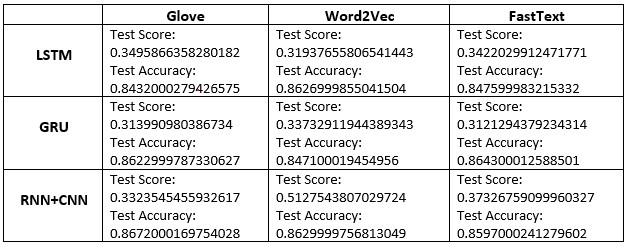